   CustomerID  Age  AnnualIncome  SpendingScore
0           1   56         76228             97
1           2   69         63984              1
2           3   46         55774             19
3           4   32         17568              2
4           5   60         77592             53
   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   56         76228             97        1
1           2   69         63984              1        0
2           3   46         55774             19        0
3           4   32         17568              2        2
4           5   60         77592             53        0


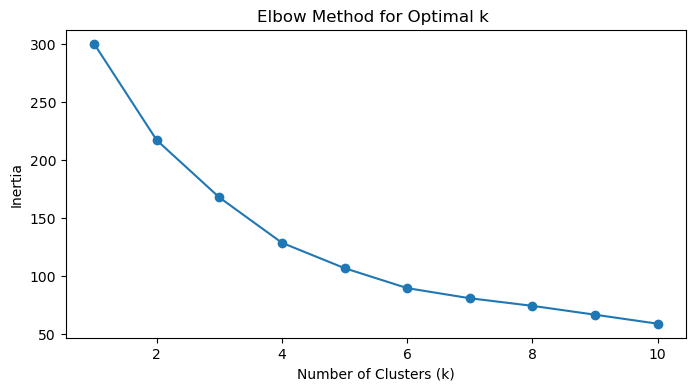

   CustomerID  Age  AnnualIncome  SpendingScore  Cluster  OptimalCluster
0           1   56         76228             97        1               1
1           2   69         63984              1        0               3
2           3   46         55774             19        0               2
3           4   32         17568              2        2               2
4           5   60         77592             53        0               3


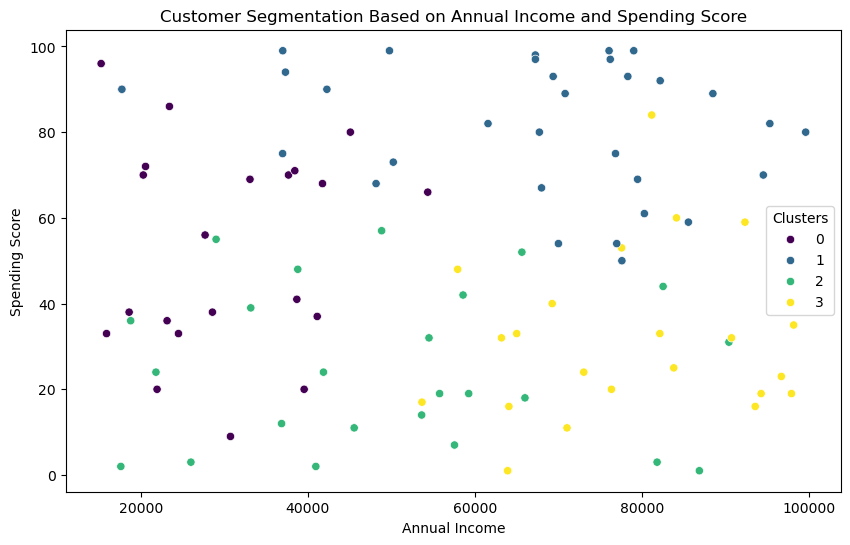

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# DATASET CREATION
# Creating the sample dataset for customer segmentation
np.random.seed(42)

# Creating a Dictionary for the dataset
data = {"CustomerID": range(1,101),
        "Age": np.random.randint(18,70, size=100), 
        "AnnualIncome": np.random.randint(15000, 100000, size=100),
        "SpendingScore": np.random.randint(1, 100, size=100)
       }

# Creating the dataframe
df = pd.DataFrame(data)

# Viewing first five rows of the dataframe
print(df.head())

# DATA PREPROCESSING
# Feature engineering

# Select features
X = df[["Age", "AnnualIncome", "SpendingScore"]]

# Create an instance of standard scaler
scaler = StandardScaler()

# fit and transform the data
X_scaled = scaler.fit_transform(X)


# APPLYING KMEANS CLUSTERING
# Applying Kmeans with 3 clusters
Kmeans = KMeans(n_clusters = 3, random_state=42)
Kmeans.fit(X_scaled)

# Adding the cluster labels to the original dataframe
df["Cluster"] = Kmeans.labels_
print(df.head())

# DETERMINING OPTIMAL CLUSTERS WITH THE ELBOW METHOD
# Calculating the inertia for different number of clusters 
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow gragh
plt.figure(figsize = (8,4))
plt.plot(range(1,11), inertia, marker = "o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k ")
plt.show()

# REAPPLYING KMEANS WITH OPTIMAL CLUSTERS
# Applying Kmeans with the optimal number of clusters (4)

optimal_kmeans = KMeans(n_clusters=4, random_state=42)
optimal_kmeans.fit(X_scaled)

df["OptimalCluster"] = optimal_kmeans.labels_
print(df.head())

# VISUALIZATION OF CLUSTERS
plt.figure(figsize=(10,6))
sns.scatterplot(x="AnnualIncome", y="SpendingScore", hue= "OptimalCluster", data=df, palette="viridis")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation Based on Annual Income and Spending Score")
plt.legend(title="Clusters")
plt.show()